# Embedding from Scratch

This notebook focuses on traditional embedding methods and implementing one by ourselves from scratch.

## What Are Embeddings?

Processing text for NLP tasks requires us to have a numeric representation of each word. Every embedding method comes down to turning a "word" (or token) into a "vector". The methods of this goal are what makes embedding techniques different from each other. A high-quality embedding gives the program or neural network a better understanding of what each token means. 

Embedding is not only for text. In a general sense, embedding is the process of converting data into vectors, and it can be applied to text, image, audio, etc. Of course, the embeddings and the emebedding methods of each modality is different and unique. Here, when mentioning embeddings, I am referring to the embedding of text.

An overview of different methods can be viewed here:


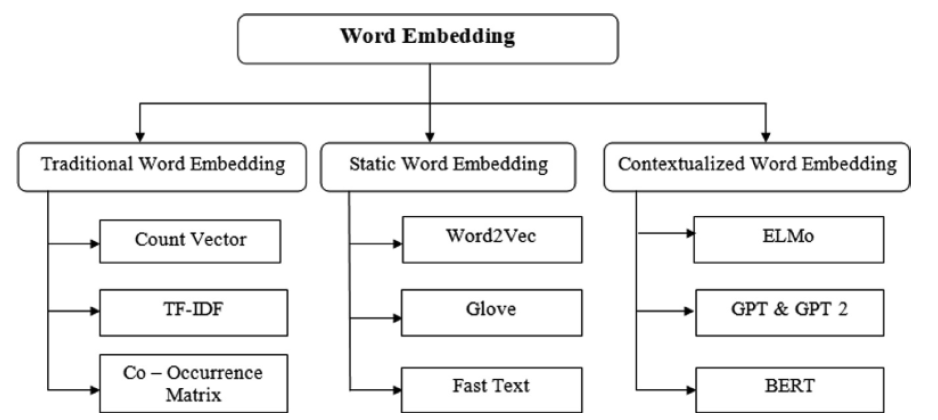

*Figure 1: Overview of different word embedding techniques. (Selva and Kanniga, 2021)*


So how can we evaluate an embedding technique? In other words, what makes an embedding ideal?
- **Quality of Semantic Representation**: Embeddings must capture the semantic relationships between words. Words with similar meanings should be placed close in the vector space andun
related words must be set apart. The vectors of "cat" and "dog" must be more similar that "dog" and "barrel". 
- **Dimensionality Efficiency**: How big must the the embedding vectors be? 15, 50, 300? Striking the right balance is key. Smaller vectors (lower dimensions) are more efficient to keep in memory or to process, while bigger vectors (higher dimensions) can capture intricate relationships, but are also prone to overfitting. For reference, GPT-2 model family has an embedding size of at least 768. 

***NOTE***: When reading about embeddings you may come across "static" vs. "dynamic/contextualized" word embeddings. Static embeddings have a fixed representation for each word, regarless of the context it appears in. For example, the word "tear" has very different meanings in "Tears felt down from her eyes" or "tearing a page out", and that dynamic word embeddings change this representation based on the context of the word. 

## Traditional Embedding Techniques
Almost every embedding technique relies on a corpus of text data to extract the relationship of the word. Previously, word embedding methods relied on statistic methods. These methods are based on the co-occurance of words in a text: words that often appear together must have a closer relationship than words that never appear together. For us in the modern day who know how embeddings can be more sophisticated, this doesn't seem a reliable approach. But to get an idea, let's check out one of these traditional embedding methods in practice:

### TF-IDF (Term Frequency-Inverse Document Frequency):
The idea of TF-IDF is to calculate the importance of a word in a document by considering two factors[1]:
1. **Term-Frequency (TF)**: How frequent a term appears in a document. A higher TF shows that a term is more important to the document.
2. **Inverse Document Frequency (IDF)**: How rare a term is across documents. This is based on the assumption that terms that appear in many of the documents are less important than terms that are unique to fewer documents. 

$$
\text{tf}(t,d) = \begin{cases}
- 1 + \log_e(f_{t,d}) & \text{if } f_{t,d} > 0 \\
- 0 & \text{if } f_{t,d} = 0
\end{cases}
$$
where $f_{t,d}$ is the raw frequency of term $t$ in document $d$


$$
\text{idf}(t,\mathcal{D}) = \log\left(\frac{N + 1}{\text{df}(t) + 1}\right) + 1
$$
where:

$t$ is a term in the vocabulary
$\mathcal{D}$ is the corpus of documents
$N$ is the total number of documents in $\mathcal{D}$
$\text{df}(t)$ is the document frequency of term $t$


Now let's start use TF-IDF using the [TinyShakespeare](https://github.com/karpathy/char-rnn/blob/master/data/tinyshakespeare/input.txt) dataset.

In [20]:
# load the dataset
with open("tinyshakespeare.txt", "r") as file:
    corpus = file.read()

print(f"Text corpus includes {len(corpus.split())} words.")

# to simulate multiple documents, we chunk up the corpus into N pieces
N = len(corpus) // 10
documents = [corpus[i:i+N] for i in range(0, len(corpus), N)]

documents = documents[:-1] #last document is residue
# now we have N documents from the corpus

Text corpus includes 202651 words.


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(documents)
words = vectorizer.get_feature_names_out()

print(f"Word count: {len(words)} e.g.: {words[:10]}")
print(f"Embedding shape: {embeddings.shape}")

Word count: 11446 e.g.: ['abandon' 'abase' 'abate' 'abated' 'abbey' 'abbot' 'abed' 'abel' 'abet'
 'abhor']
Embedding shape: (10, 11446)


let's now visualize the embeddings in 2d space.

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings.T)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
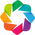

In [50]:
import pandas as pd 
import holoviews as hv
hv.extension('bokeh')

df = pd.DataFrame({
    'x': emb_2d[:, 0],
    'y': emb_2d[:, 1],
    'word': list(words)
})

# sample of words we are interested in
special_words = ['dog', 'cat', 'animal', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
# show only 200 words that are not special, otherwhise the plot would be too dense
mask = df['word'].isin(special_words)
non_special_df = df[~mask].sample(n=200, random_state=42)
special_df = df[mask]
df = pd.concat([special_df, non_special_df])

# show special words in red
df['color'] = 'gray'
df.loc[df['word'].isin(special_words), 'color'] = 'red'

df['size'] = 5  
df.loc[df['word'].isin(special_words), 'size'] = 15

# add label color column
df['label_color'] = 'gray'
df.loc[df['word'].isin(special_words), 'label_color'] = 'red'

points = hv.Points(df, kdims=['x', 'y'], vdims=['word', 'color', 'size', 'label_color'])

# add labels and customize
labels = hv.Labels(points, ['x', 'y'], ['word', 'label_color'])

# Create plot with separate options for Points and Labels
points_opts = hv.opts.Points(
    width=800, height=600,
    tools=['hover', 'box_zoom', 'wheel_zoom', 'pan', 'reset'],
    alpha=0.3,  # More transparent for regular words
    color='color',
    size='size'
)

labels_opts = hv.opts.Labels(
    text_font_size='8pt',
    text_color='label_color'
)

plot = (points.opts(points_opts) * labels.opts(labels_opts)).opts(
    xlabel='Component 1', 
    ylabel='Component 2'
)

# Save the plot
hv.save(plot, 'tf-idf-embeddings.html')


In [52]:
plot

:Overlay
   .Points.I :Points   [x,y]   (word,color,size,label_color)
   .Labels.I :Labels   [x,y]   (word,label_color)

Because TF-IDF is based on the occurance frequency of terms in the document, it doesn't hold any semantic meanings. Vectors that are similar to each other are irrelevant in meaning. And words that are semanticly close, like numbers from one to ten, have no relationship in the vector space. The inability of TF-IDF and similar approaches is what makes them unsuitable for many NLP tasks. However, the simplicity makes these methods useful in applications such as information retreival, keyword extraction, and basic text analysis. You can read about some of these methods in [2].

## word2vec


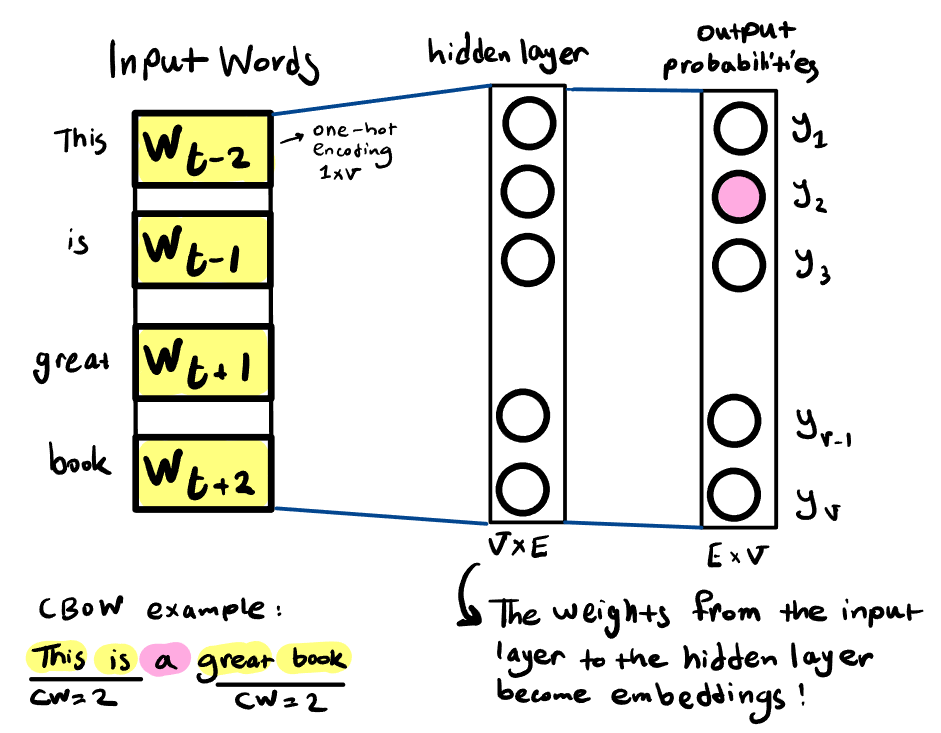

*Figure 2: word2vec in a CBOW example*

[1] Vardhan, H. (2024, November 22). A Comprehensive Guide to Word Embeddings in NLP - Harsh Vardhan - Medium. Medium. https://medium.com/@harsh.vardhan7695/a-comprehensive-guide-to-word-embeddings-in-nlp-ee3f9e4663ed
[2] Turing. (2022, February 10). A Guide on Word embeddings in NLP. https://www.turing.com/kb/guide-on-word-embeddings-in-nlp